In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:


df = pd.read_csv('/Users/eric5805/Documents/Data Science/Data_set/i485_origin.csv')
df.columns

Index(['LocationID', 'COUNTY', 'ROUTE', 'LOCATION', 'AADT_2002', 'AADT_2003',
       'AADT_2004', 'AADT_2005', 'AADT_2006', 'AADT_2007', 'AADT_2008',
       'AADT_2009', 'AADT_2010', 'AADT_2011', 'AADT_2012', 'AADT_2013',
       'AADT_2014', 'AADT_2015', 'AADT_2016', 'AADT_2017', 'AADT_2018',
       'AADT_2019', 'AADT_2020', 'AADT_2021', 'AADT_2022', 'AADT_2023'],
      dtype='object')

In [98]:
aadt_cols = ['AADT_2002', 'AADT_2003', 'AADT_2004', 'AADT_2005', 'AADT_2006',
              'AADT_2007', 'AADT_2008', 'AADT_2009', 'AADT_2010', 'AADT_2011',
              'AADT_2012', 'AADT_2013', 'AADT_2014', 'AADT_2015', 'AADT_2016',
              'AADT_2017', 'AADT_2018', 'AADT_2019', 'AADT_2020', 'AADT_2021',
              'AADT_2022', 'AADT_2023']
aadt_df = df[aadt_cols].apply(pd.to_numeric, errors='coerce')




In [99]:
# Compute row-wise mean (exit-wise mean)
aadt_at_each_exit = aadt_df.mean(axis=1).round(2)

# Fill missing values using row-wise mean
aadt_df = aadt_df.T.fillna(aadt_at_each_exit).T

# Assign back to the original DataFrame
df[aadt_cols] = aadt_df

# Uncomment this line if you want to save the cleaned dataset
# df.to_csv('/Users/eric5805/Documents/Data Science/Data_set/i485_origin_cleaned.csv', index=False)


In [100]:
mean = df[aadt_cols].mean().round(2)
max_of_each_exit = df[aadt_cols].sum()
median = df[aadt_cols].median().round(2)
std = df[aadt_cols].std().round(2)
years = list(range(2002, 2024))

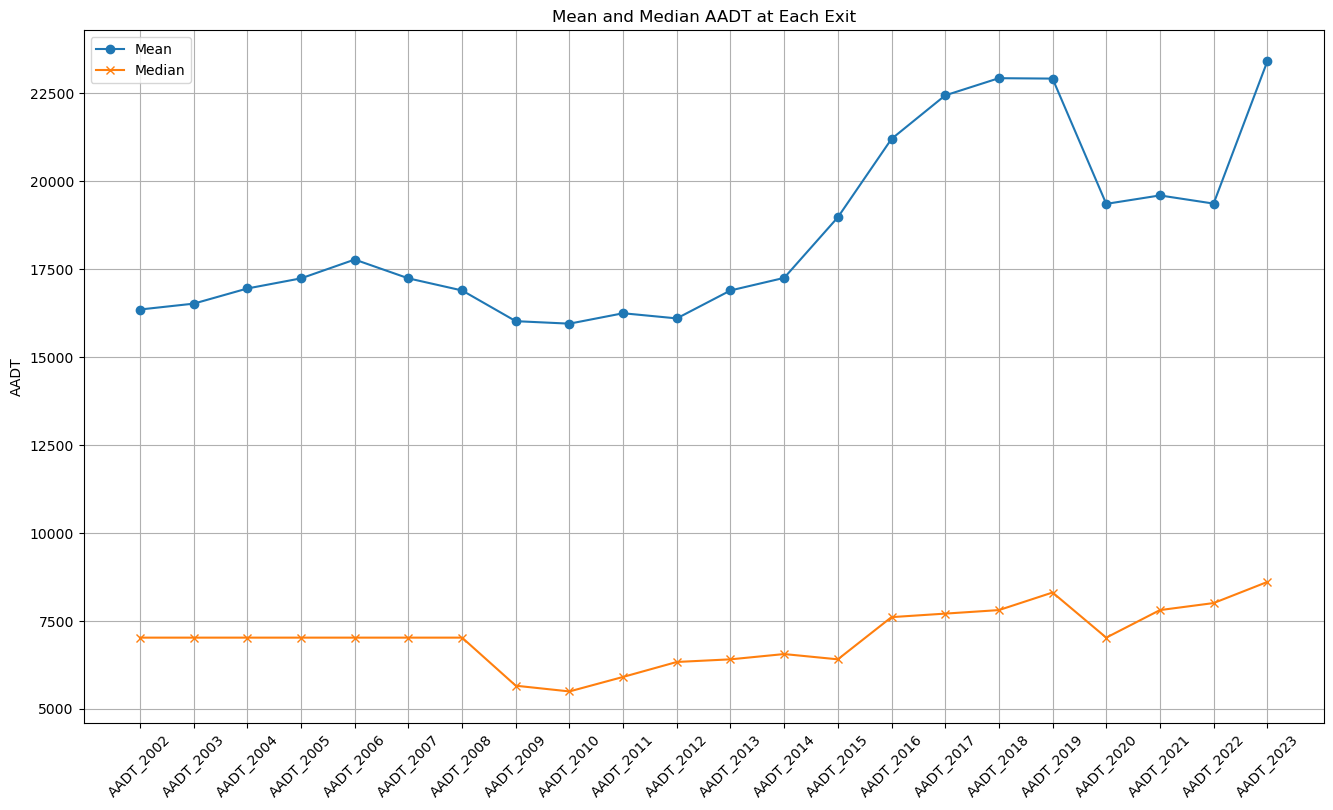

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(mean, label='Mean',marker='o')
plt.plot(median, label='Median',marker='x')



plt.legend()
plt.title('Mean and Median AADT at Each Exit')


plt.ylabel('AADT')
plt.grid(True)
# Ensure x-axis labels are clear
plt.xticks(mean.index, rotation=45)

plt.show()


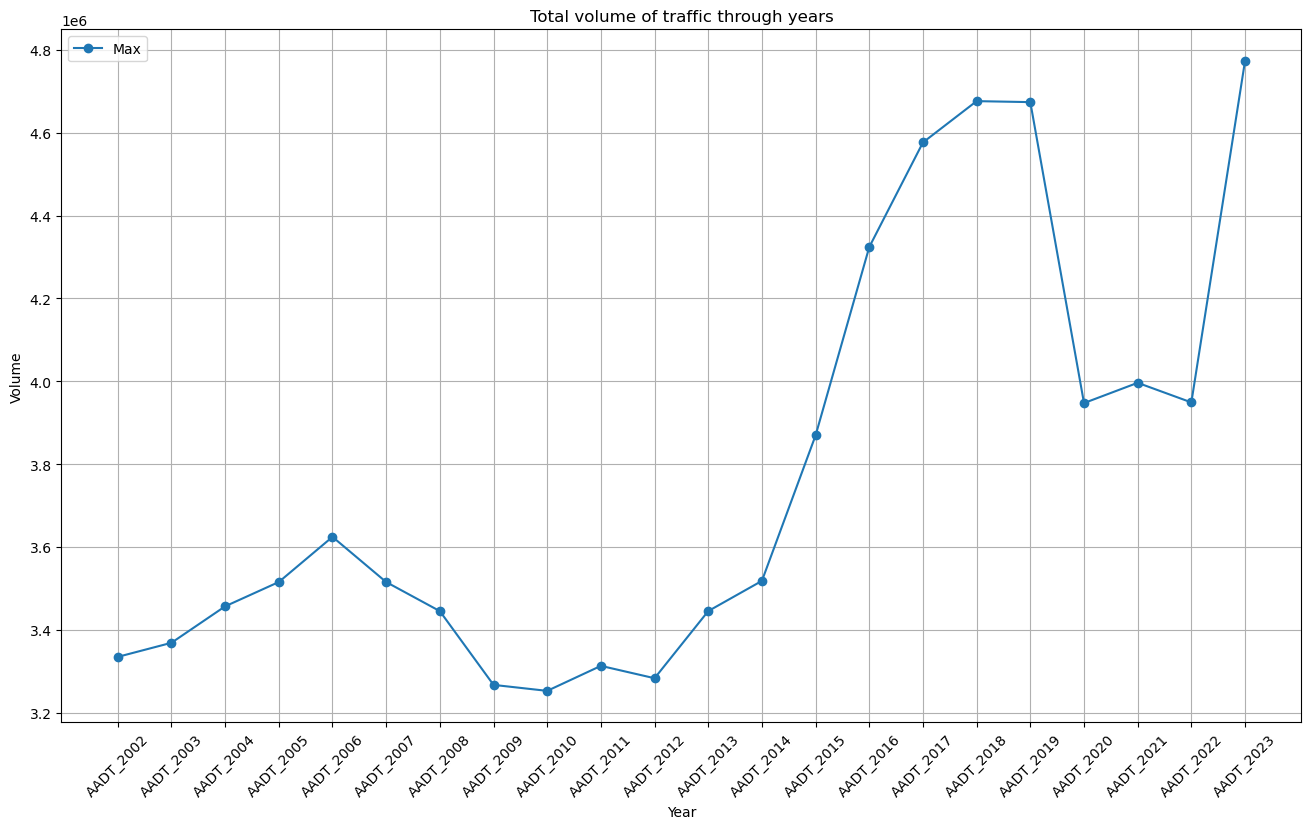

In [102]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))

plt.plot(max_of_each_exit, label='Max',marker='o')

plt.legend()
plt.title('Total volume of traffic through years')

plt.xlabel('Year')
plt.ylabel('Volume')
plt.grid(True)
# Ensure x-axis labels are clear
plt.xticks(mean.index, rotation=45)  # Show every 2nd year and rotate

plt.show()
